## Climate Model Simulation Crashes (Failures)

### Data Analysis

In [1]:

import pandas as pd
import os
import numpy as np
import requests
import io
import itertools
import seaborn as sns
from funcs_climsim import nboxplot, sctrmtrx, catbar

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

plt.rcParams['axes.grid'] = True
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['grid.color'] = 'k'
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'
# plt.rcParams['xtick.top'] = True
# plt.rcParams['ytick.right'] = True
# plt.rcParams['xtick.bottom'] = True
# plt.rcParams['ytick.left'] = True

### Pull data

In [ ]:
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00252/pop_failures.dat'
# response = requests.get(url)
# response = response.text
# df = pd.read_csv(io.StringIO(response), sep='\s+')
# df.to_csv(os.getcwd() + '/data/pop_failures.csv', index=False)
# df.head()


### Exploratory Data Analysis

In [2]:
df = pd.read_csv(os.getcwd() + '/data/pop_failures.csv', ) 
features = list(df.iloc[:, 2:-1].columns)
df['outcome'] = ~df['outcome'].astype(bool)*1 # invert labels, set Failures equal to 1, and Successes to 0

df = df.sort_values(['Study', 'Run'])
df.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,1
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,0
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,0
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,0
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,0


In [3]:
# print number of duplicated rows
print(f'Number of duplicated rows: {df.duplicated().sum()} \n \n')
print(f'Columns missing entries: \n')
# print the total number and the percent of missing values per column
for col in df:
    print('{}  \t ({}%)'.format(sum(df[col].isna()), round(sum(df[col].isna()) / df.shape[0] * 100, 2)), '\t', col)

Number of duplicated rows: 0 
 

Columns missing entries: 

0  	 (0.0%) 	 Study
0  	 (0.0%) 	 Run
0  	 (0.0%) 	 vconst_corr
0  	 (0.0%) 	 vconst_2
0  	 (0.0%) 	 vconst_3
0  	 (0.0%) 	 vconst_4
0  	 (0.0%) 	 vconst_5
0  	 (0.0%) 	 vconst_7
0  	 (0.0%) 	 ah_corr
0  	 (0.0%) 	 ah_bolus
0  	 (0.0%) 	 slm_corr
0  	 (0.0%) 	 efficiency_factor
0  	 (0.0%) 	 tidal_mix_max
0  	 (0.0%) 	 vertical_decay_scale
0  	 (0.0%) 	 convect_corr
0  	 (0.0%) 	 bckgrnd_vdc1
0  	 (0.0%) 	 bckgrnd_vdc_ban
0  	 (0.0%) 	 bckgrnd_vdc_eq
0  	 (0.0%) 	 bckgrnd_vdc_psim
0  	 (0.0%) 	 Prandtl
0  	 (0.0%) 	 outcome


In [4]:
df[features + ['outcome']].describe()

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,0.500026,0.500097,0.500027,0.500119,0.500001,0.499913,0.500059,0.500076,0.500044,0.500111,0.499984,0.500032,0.499933,0.499944,0.499946,0.500044,0.500020,0.500021,0.085185
std,0.288939,0.288922,0.289067,0.288993,0.288827,0.288852,0.289010,0.288909,0.288860,0.288966,0.289127,0.289014,0.288822,0.288949,0.288923,0.288813,0.288936,0.289013,0.279416
min,0.000414,0.001922,0.001181,0.001972,0.000858,0.000476,0.004590,0.000296,0.003231,0.002015,0.000419,0.001188,0.001312,0.002509,0.000732,0.000891,0.000219,0.000263,0.000000
25%,0.249650,0.251597,0.251540,0.250158,0.250630,0.251325,0.253048,0.250402,0.252661,0.250758,0.251676,0.249669,0.249988,0.249586,0.249974,0.250412,0.252739,0.249723,0.000000
50%,0.499998,0.499595,0.500104,0.500456,0.500903,0.499174,0.499070,0.500074,0.500295,0.500393,0.500322,0.500151,0.500625,0.499080,0.499959,0.500384,0.498955,0.499431,0.000000
75%,0.750042,0.750011,0.749180,0.750348,0.748988,0.748166,0.750109,0.749091,0.748605,0.749447,0.749346,0.749164,0.749569,0.750012,0.747978,0.749256,0.748539,0.749792,0.000000
max,0.999194,0.998815,0.998263,0.997673,0.998944,0.997142,0.998930,0.998506,0.997172,0.999536,0.999942,0.997718,0.997518,0.999795,0.999155,0.997265,0.999306,0.999655,1.000000


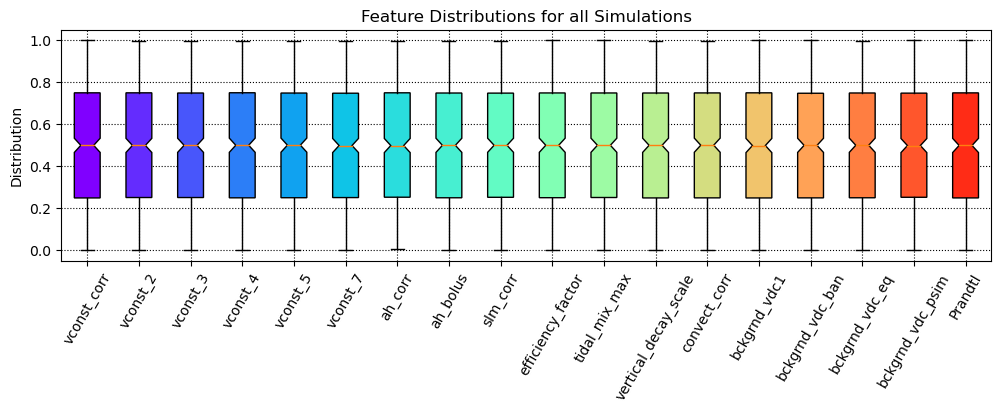

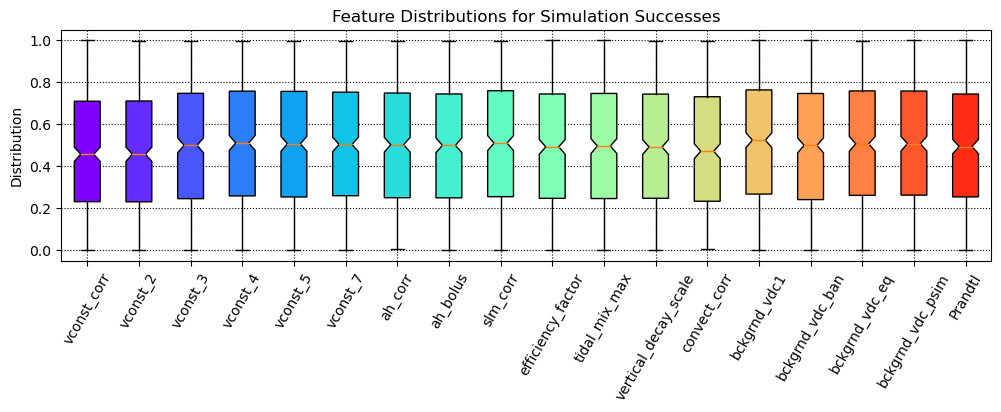

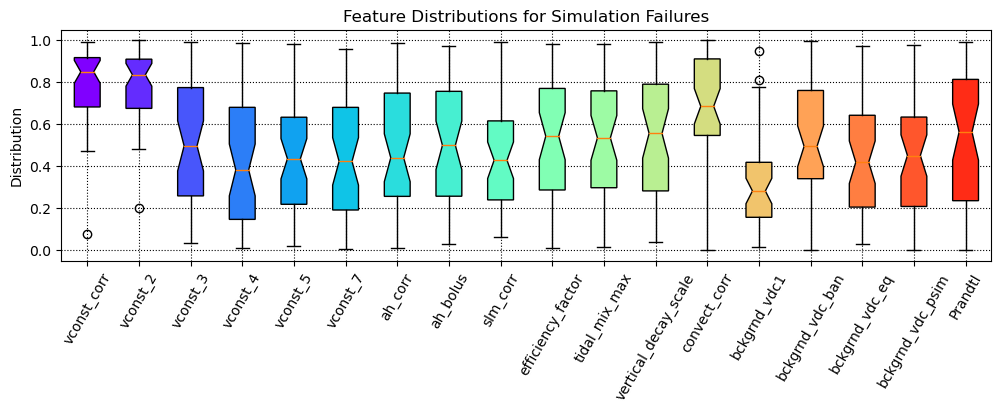

In [5]:
nboxplot(df=df, cols=features, title='Feature Distributions for all Simulations')
nboxplot(df=df.loc[df['outcome'] == 0], cols=features, title='Feature Distributions for Simulation Successes')
nboxplot(df=df.loc[df['outcome'] == 1], cols=features, title='Feature Distributions for Simulation Failures')

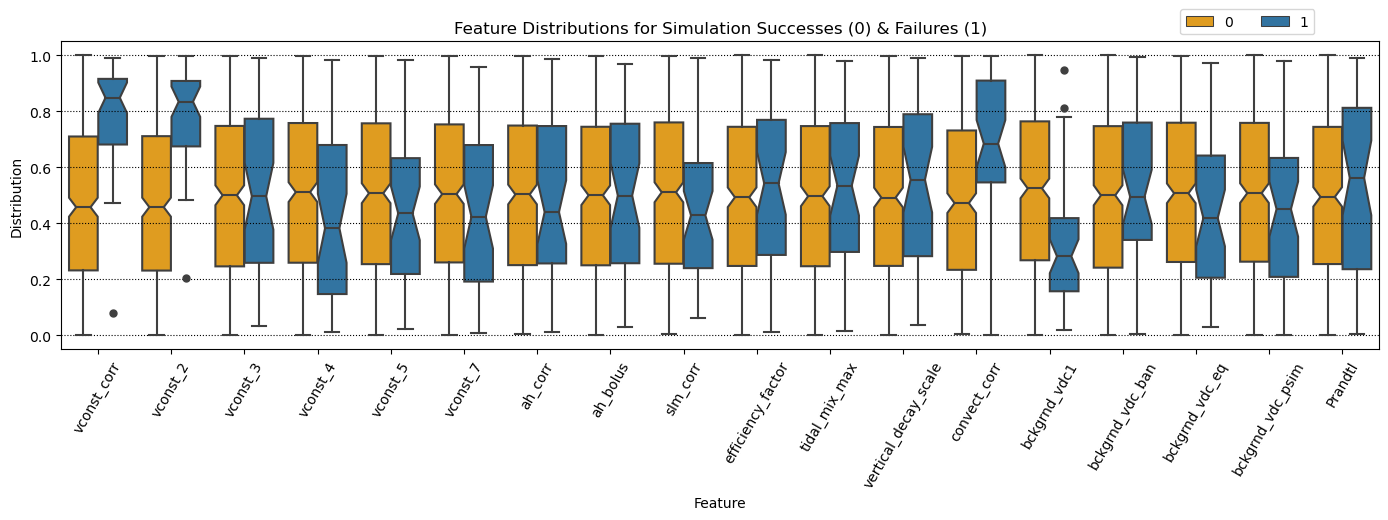

In [6]:
plt.figure(figsize=(17, 4))

ax = sns.boxplot(
            data=df.loc[:, features + ['outcome']].melt(id_vars=['outcome'], var_name='Feature', value_name='Distribution'),
            x="Feature", 
            y="Distribution",
            hue="outcome", 
            palette=["orange", "tab:blue"],
            notch=True, 
        flierprops={"marker": "o"},
           )
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.9, 1), ncol=2, title=None)
plt.xticks(rotation=60)
plt.title('Feature Distributions for Simulation Successes (0) & Failures (1)')
plt.show()

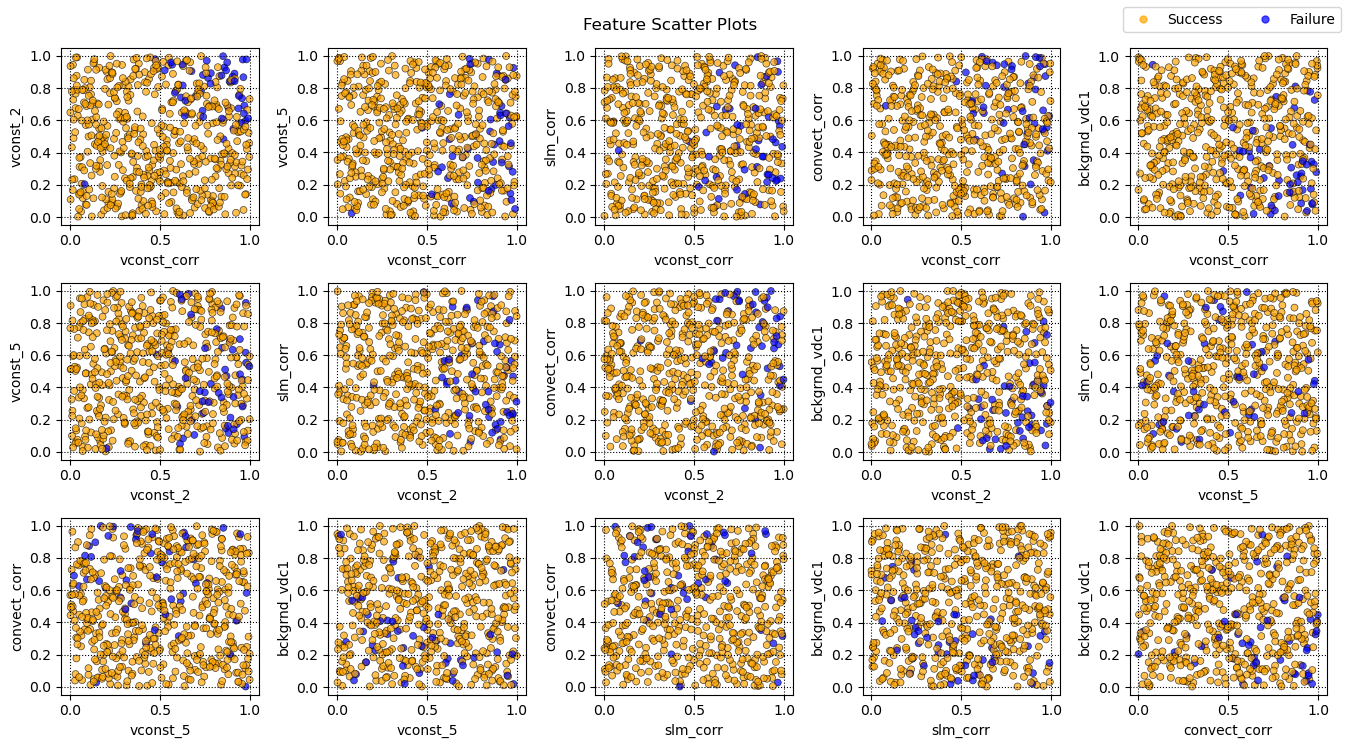

In [7]:
pairs = ['vconst_corr', 'vconst_2', 'vconst_5', 'slm_corr','convect_corr', 'bckgrnd_vdc1']
pairs = list(itertools.combinations(pairs, 2))

sctrmtrx(df=df, pairs=pairs, m=3, n=5)

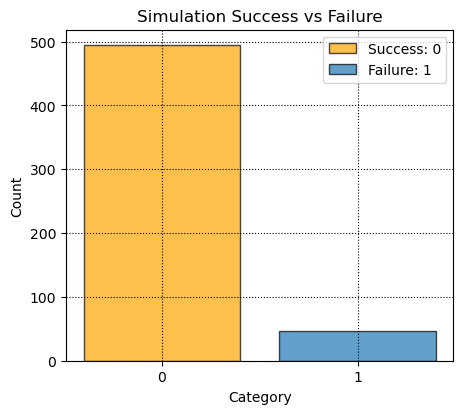

In [8]:
catbar(df)